### Linear Regression Algerian Forest Dataset

#### Problem statement

Here is algerian dataset which has attributes
Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws :Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

We need to find the temprature as based on the other conditions. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the Algerian Forestdata

In [54]:
# Loading the Algerian Forest data with header 1 and skiping the rows 125,126
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1,skiprows=[124,125,126])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [55]:
df[120:135]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


In [56]:
df.shape

(244, 14)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [58]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [59]:
col = [x.strip() for x in df.columns]
print(col)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [60]:
df.columns = col

In [61]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [62]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [64]:
# Adding the region
df['Region']= [1 if i <= 121 else 0 for i in df.index]

In [65]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [66]:
# dropping the year columns it has same data throuhout the dataset
df.drop(['year'], axis=1, inplace=True)

In [67]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


#### finding missing values

In [68]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Here we can see no missing values

In [69]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

here if you we observe there are only 'fire' and 'not fire' values are present here we need to convert other thing to above two values 

In [70]:
df['Classes'] = df['Classes'].map(lambda x: x.strip())

In [71]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [72]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [73]:
#encoding the data values using one hot encoding techiniue
encoded_data = pd.get_dummies(df,columns=['Classes'],drop_first=True)
encoded_data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [74]:
encoded_data.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire'],
      dtype='object')

In [75]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               244 non-null    int64  
 1   month             244 non-null    int64  
 2   Temperature       244 non-null    int64  
 3   RH                244 non-null    int64  
 4   Ws                244 non-null    int64  
 5   Rain              244 non-null    float64
 6   FFMC              244 non-null    float64
 7   DMC               244 non-null    float64
 8   DC                244 non-null    float64
 9   ISI               244 non-null    float64
 10  BUI               244 non-null    float64
 11  FWI               244 non-null    float64
 12  Region            244 non-null    int64  
 13  Classes_not fire  244 non-null    uint8  
dtypes: float64(7), int64(6), uint8(1)
memory usage: 25.1 KB


In [82]:
x_col = ['day', 'month','RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
print(x_col)
y_col = ['Temperature']
print(y_col)

['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
['Temperature']


### EDA for Algerian Forest dataset

In [83]:
encoded_data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350486,-4.662229e-16,-0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.082103,6.718556e-17,-0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.565965,-2.734961e-01,-0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.579319,4.064239e-01,0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.033277,1.768290e-01,0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324628,4.108006e-02,0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691026,-2.246798e-01,-0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875545,-1.910937e-01,-0.584188
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.737810,8.148947e-02,-0.507122
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.918226,-2.684206e-01,-0.735511


In [84]:
encoded_data.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.043443,0.500000,0.434426
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.426307,0.501028,0.496700
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,0.500000,0.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


### univariate analysis

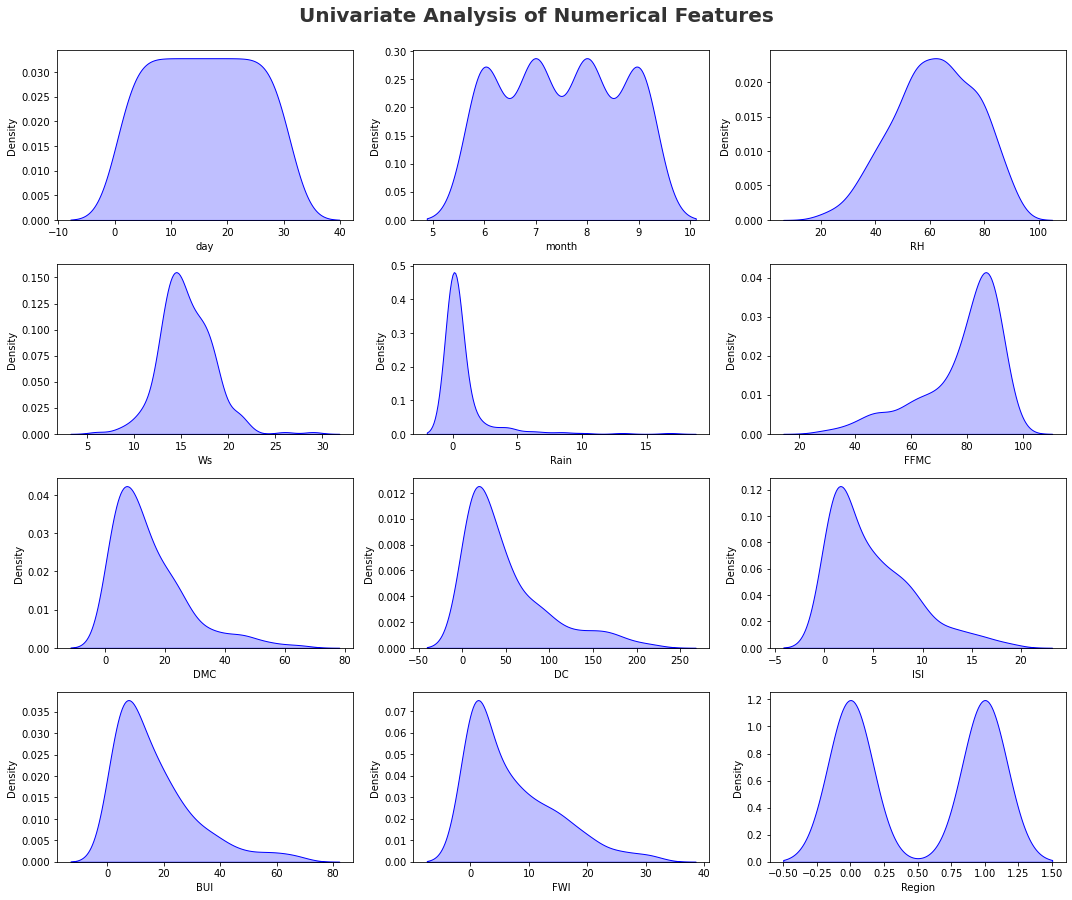

In [86]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(x_col)-1):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[x_col[i]],shade=True, color='b')
    plt.xlabel(x_col[i])
    plt.tight_layout()

__Report__

  - Rain, DMC,DC,ISI,BUI FWI are left skewed or negatively skewed.
  - FFMC is postively skewed or right skewed

In [3]:
plt.figure(figsize=(15, 15))
sns.displot(df['Temperature'],kind='kde')
plt.show()

NameError: name 'df' is not defined

<Figure size 1080x1080 with 0 Axes>

Temprature is distributed normally.

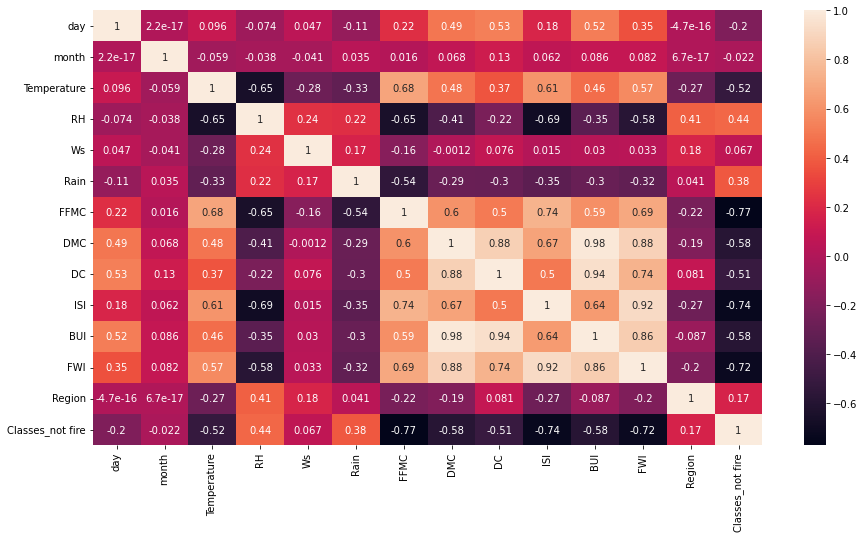

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(encoded_data.corr(),annot=True)
plt.show()

__Report__

  - We can obaserve month, RH,Ws,Rain,Region and Classes are -vely correlated with temparature
  - We can observer that day, FFMC,DMC,DC,ISI,BUI and FWI are +vely correlated with tempareture
  - If we observe heatmap carefully BUI has correlation with DC and DMC almost 1  so any of feature is sufficient for the recongization of temprature

In [90]:
x_col = ['day', 'month','RH', 'Ws', 'Rain', 'FFMC',
        'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
print(x_col)
y_col = ['Temperature']
print(y_col)

['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
['Temperature']


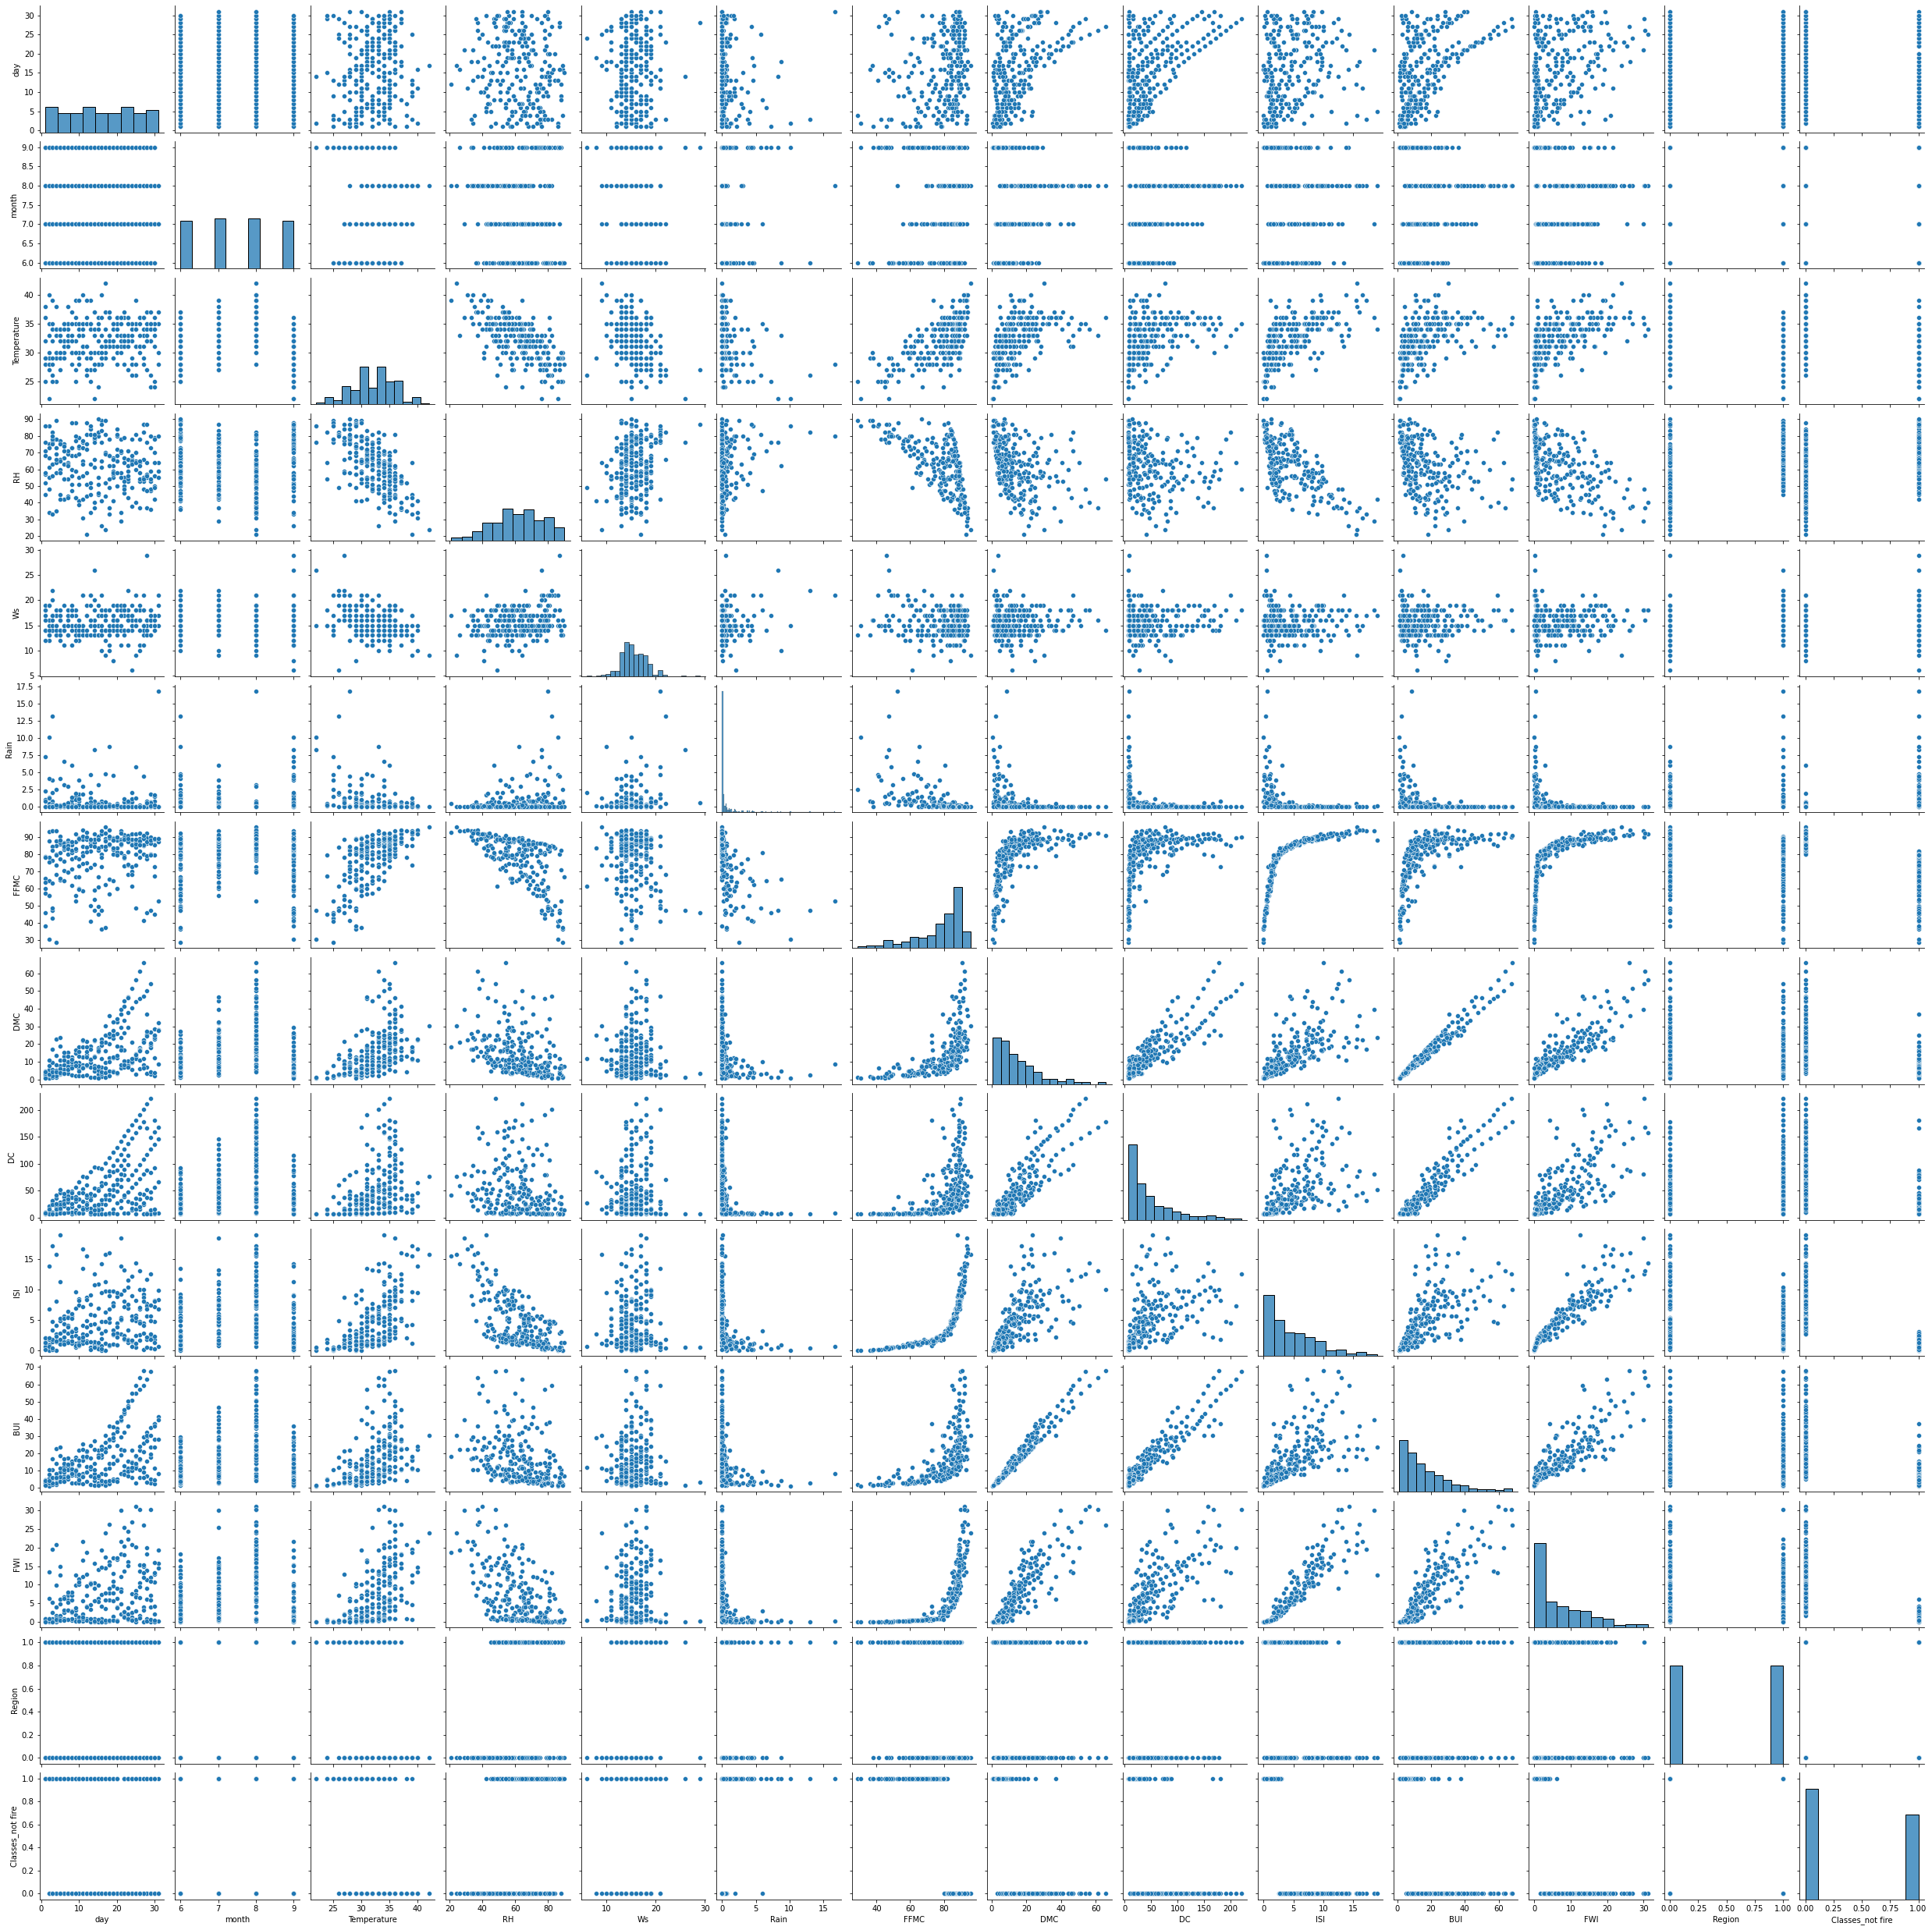

In [96]:
sns.pairplot(encoded_data)

Text(0, 0.5, 'Temperature')

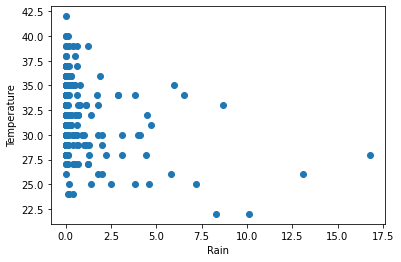

In [97]:
plt.scatter(encoded_data['Rain'],encoded_data['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

 - from scatter plot we observe that less rain fall more likely high temprature

Text(0, 0.5, 'Temperature')

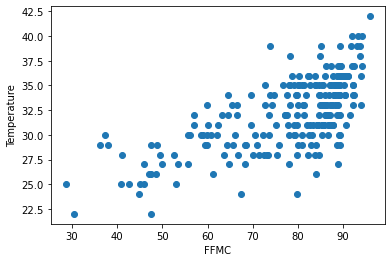

In [98]:
plt.scatter(encoded_data['FFMC'],encoded_data['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

 - FFMC has the linear relationship with the temprature

Text(0, 0.5, 'Temperature')

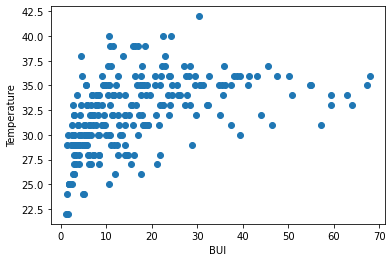

In [99]:
plt.scatter(encoded_data['BUI'],encoded_data['Temperature'])
plt.xlabel('BUI')
plt.ylabel('Temperature')

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

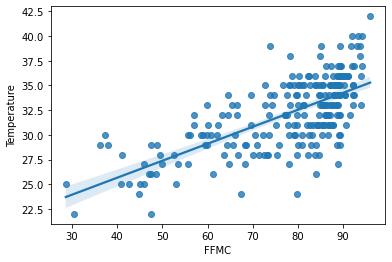

In [100]:
sns.regplot(x='FFMC',y='Temperature',data=encoded_data)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

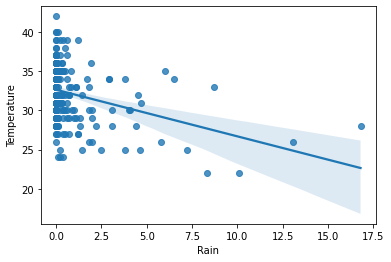

In [101]:
sns.regplot(x='Rain',y='Temperature',data=encoded_data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain'>

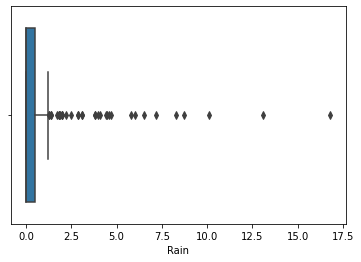

In [102]:
sns.boxplot(encoded_data['Rain'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

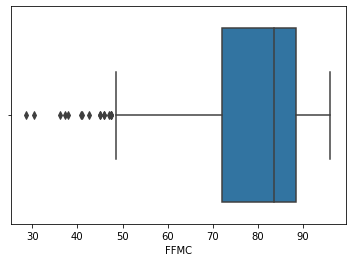

In [103]:
sns.boxplot(encoded_data['FFMC'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUI'>

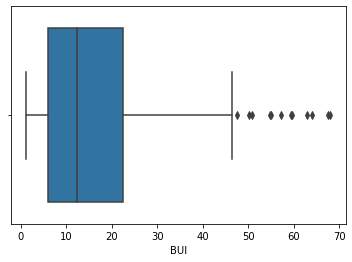

In [104]:
sns.boxplot(encoded_data['BUI'])

In [105]:
X = encoded_data[x_col]
X.head()

,day,month,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,57,18,0.0,65.7,1.3,3.4,0.5,1,1
1,2,6,61,13,1.3,64.4,1.0,3.9,0.4,1,1
2,3,6,82,22,13.1,47.1,0.3,2.7,0.1,1,1
3,4,6,89,13,2.5,28.6,0.0,1.7,0.0,1,1
4,5,6,77,16,0.0,64.8,1.2,3.9,0.5,1,1


In [107]:
y = encoded_data['Temperature']
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

### Modeling using Different Regression models

In [108]:
# train test split
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
...    X, y, test_size=0.33, random_state=10)

In [110]:
X_train

,day,month,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region,Classes_not fire
237,24,9,49,6,2.0,61.3,0.6,11.9,0.4,0,1
78,18,8,54,18,0.0,89.4,9.7,27.5,16.1,1,0
25,26,6,64,18,0.0,86.8,6.7,21.6,10.6,1,0
124,3,6,80,14,2.0,48.7,0.3,2.6,0.1,0,1
176,25,7,64,9,1.2,73.8,1.1,11.4,0.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,4.0,8.2,3.9,1,0
15,16,6,89,13,0.7,36.1,0.0,2.2,0.0,1,1
228,15,9,51,13,0.0,88.7,6.9,17.8,9.8,0,0
125,4,6,64,14,0.0,79.4,2.2,5.6,1.0,0,1


In [111]:
y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int64

In [112]:
# standarding the featues using Standard Scaler feature
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [117]:
X_test = scaler.transform(X_test)

In [118]:
X_train

array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.86520142,
        -0.98176139,  1.06992376],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  1.21536327,
         1.01857744, -0.93464604],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.48650303,
         1.01857744, -0.93464604],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.380487  ,
        -0.98176139, -0.93464604],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.78568939,
        -0.98176139,  1.06992376],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.79894139,
         1.01857744,  1.06992376]])

In [119]:
X_test

array([[-4.92481607e-01, -4.48858777e-01, -3.92594448e-01,
        -9.14668296e-02,  1.48701853e+00, -1.82411230e-01,
        -7.33442383e-01, -6.82030988e-01, -8.12193399e-01,
        -9.81761387e-01,  1.06992376e+00],
       [ 1.90020102e+00, -4.48858777e-01,  1.37367416e-01,
         6.35806011e-01, -4.41414004e-01,  6.64566895e-01,
         4.94418103e-01,  1.72378441e+00,  1.16235526e+00,
         1.01857744e+00, -9.34646039e-01],
       [-1.68882292e+00,  4.43384889e-01, -1.12129201e+00,
        -4.55103250e-01, -4.41414004e-01,  9.08075201e-02,
        -6.38991577e-01, -8.28897625e-01, -7.98941394e-01,
         1.01857744e+00,  1.06992376e+00],
       [-1.44955466e+00,  4.43384889e-01,  7.11221826e-02,
        -4.55103250e-01, -2.41920984e-01, -5.94627923e-02,
        -7.09829682e-01, -7.72948430e-01, -8.12193399e-01,
         1.01857744e+00,  1.06992376e+00],
       [-7.31749870e-01,  4.43384889e-01, -1.93858749e-01,
         6.35806011e-01, -4.41414004e-01,  6.78227832e-01,
  

### Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
regression = LinearRegression()
regression

LinearRegression()

In [123]:
regression.fit(X_train,y_train)

LinearRegression()

In [124]:
print(regression.coef_)

[-0.11689001 -0.24674099 -1.22139116 -0.55425199 -0.22951337  0.95978238
  0.20249614  0.62182379 -0.25184499 -0.1121761  -0.16485371]


In [125]:
print(regression.intercept_)

32.17791411042945


In [126]:
# prediction for testdata
reg_prd = regression.predict(X_test)
reg_prd

array([31.92574725, 33.20461976, 33.34191017, 31.69130838, 32.89486282,
       34.56452955, 33.30659931, 33.26169054, 32.15381738, 33.21820379,
       33.79696167, 27.25336102, 35.30739321, 29.15970784, 32.45331169,
       32.36449309, 34.62877197, 27.45723838, 36.22479829, 34.79584742,
       33.14977662, 33.27221189, 33.75559108, 33.25976485, 35.8484743 ,
       29.25771396, 31.89695192, 32.47206801, 27.03347161, 32.19122871,
       25.47373181, 26.7400605 , 34.38811125, 32.22396649, 33.07414905,
       30.29438245, 28.95637303, 32.39390937, 27.24772189, 35.15558834,
       32.25991119, 34.24874965, 34.39888196, 31.10639793, 36.40965432,
       34.04862267, 24.50111066, 35.33643152, 34.25465786, 29.11055143,
       31.4533572 , 32.59376114, 35.80607159, 32.61104631, 29.98331326,
       29.68410302, 33.1594252 , 36.5603598 , 31.50932276, 33.18051177,
       32.4101934 , 32.66796226, 31.46684163, 24.92908424, 31.42854782,
       36.12366376, 29.56733304, 29.6026584 , 35.14443724, 33.89

#### Assumption of Linear Regression

Text(0, 0.5, 'Test Predict Data')

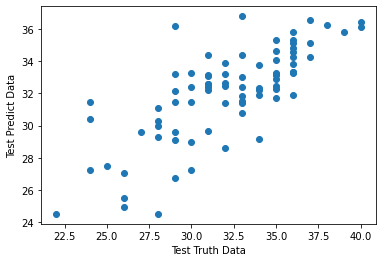

In [127]:
# relation between real and pred data 
plt.scatter(y_test,reg_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

 - The relation b/w test predicted data and test truth data are in the linear 

In [128]:
## calculate residual
residual = y_test-reg_prd
residual

162    2.074253
60     1.795380
61     2.658090
63     3.308692
69     2.105137
         ...   
169   -0.009559
232   -7.205924
144    1.189368
208   -3.798214
105   -2.503277
Name: Temperature, Length: 81, dtype: float64

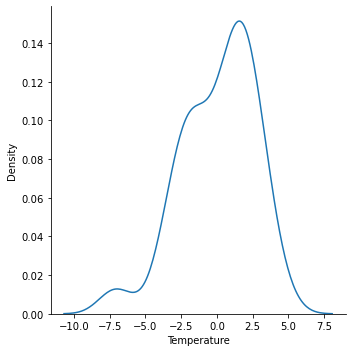

In [129]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little sked due to outliers

  - distribution of data is little leftsked data distribued we can overcome this by hyperparameter tuening

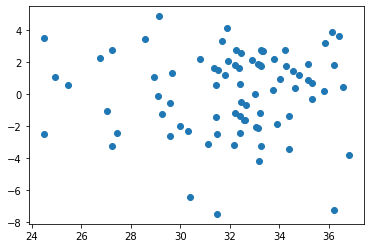

In [130]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(reg_prd,residual)

  - Data b/w the reg_prd and residual are in random in nature

### performance Matrics

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,reg_prd))
print(mean_absolute_error(y_test,reg_prd))
print(np.sqrt(mean_squared_error(y_test,reg_prd)))

6.5816030272677315
2.1205343392927407
2.5654635111939776


In [132]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_prd)
print(score)

0.5647775861042997


In [133]:
## Adjusted R2 need to write
# need to perform
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.5441420406178656


### Ridge Regression

In [134]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [135]:
ridge_reg

Ridge(alpha=0.1)

In [136]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [137]:
print(ridge_reg.coef_)

[-0.11624224 -0.24649996 -1.21976593 -0.55425005 -0.22981132  0.96034813
  0.19675028  0.61509829 -0.24015021 -0.11254519 -0.16433983]


In [138]:
print(ridge_reg.intercept_)

32.17791411042945


In [139]:
rid_pred =ridge_reg.predict(X_test)
rid_pred

array([31.92435055, 33.20477753, 33.33935946, 31.69058191, 32.89483503,
       34.56556737, 33.30843966, 33.25645332, 32.15365364, 33.21764089,
       33.79939422, 27.2554824 , 35.30602053, 29.16060305, 32.44945467,
       32.36666455, 34.62677669, 27.46140359, 36.22553983, 34.79734891,
       33.14826373, 33.27541719, 33.75701222, 33.26165036, 35.84753787,
       29.26042981, 31.89421492, 32.47113472, 27.03737166, 32.18974055,
       25.47655123, 26.74403344, 34.38677457, 32.22168957, 33.0745562 ,
       30.2952776 , 28.95835015, 32.39407453, 27.25166568, 35.15618297,
       32.26195474, 34.25092923, 34.3992862 , 31.1073926 , 36.41022556,
       34.04837241, 24.49958929, 35.33582156, 34.2563649 , 29.11433147,
       31.45399443, 32.59392198, 35.80748393, 32.60984371, 29.98547678,
       29.68464403, 33.15465793, 36.56227181, 31.50559422, 33.1809405 ,
       32.4082733 , 32.66756453, 31.46580431, 24.92843441, 31.42597414,
       36.12101738, 29.57103109, 29.60047348, 35.14382226, 33.89

Text(0, 0.5, 'Test Predict Data')

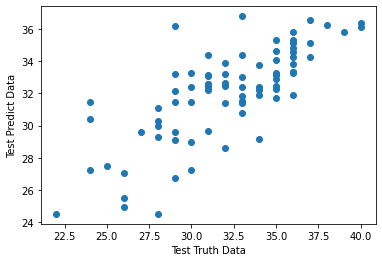

In [140]:
# relation between real and pred data 
plt.scatter(y_test,rid_pred) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [141]:
## calculate residual
residual = y_test-rid_pred
residual

162    2.075649
60     1.795222
61     2.660641
63     3.309418
69     2.105165
         ...   
169   -0.009913
232   -7.199385
144    1.189286
208   -3.799578
105   -2.504826
Name: Temperature, Length: 81, dtype: float64

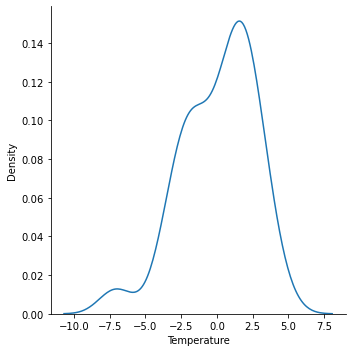

In [142]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little left-sked due to outliers

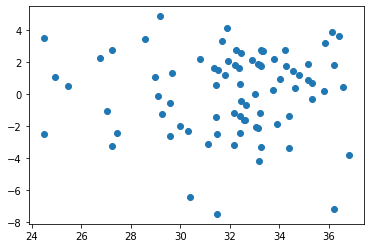

In [143]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(rid_pred,residual)

### Performance Metric

In [144]:
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

6.583012887736955
2.1209290958726004
2.5657382734287135


In [145]:
score = r2_score(y_test,rid_pred)
print(score)

0.5646843561002826


In [146]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.544044390225727


### Lasso regerssion

In [147]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso

Lasso(alpha=0.1)

In [148]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [149]:
print(lasso.coef_)

[-0.         -0.11170021 -1.17125794 -0.42769277 -0.1188879   1.0955173
  0.05836792  0.3316874   0.         -0.0488374  -0.08460019]


In [150]:
print(lasso.intercept_)

32.17791411042945


In [151]:
ls_prd = lasso.predict(X_test)

Text(0, 0.5, 'Test Predict Data')

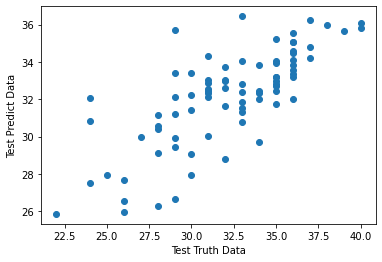

In [152]:
# relation between real and pred data 
plt.scatter(y_test,ls_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [153]:
## calculate residual
residual = y_test-ls_prd
residual

162    1.961222
60     1.794305
61     2.664177
63     3.234720
69     2.030165
         ...   
169    0.201598
232   -6.691684
144    1.131050
208   -3.444050
105   -3.864794
Name: Temperature, Length: 81, dtype: float64

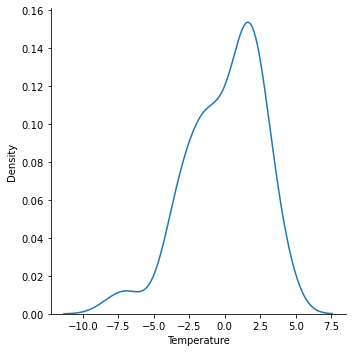

In [154]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde') 

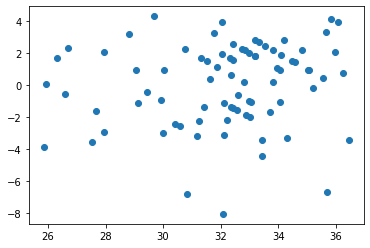

In [155]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(ls_prd,residual)

### performance Metirc

In [156]:

print(mean_squared_error(y_test,ls_prd))
print(mean_absolute_error(y_test,ls_prd))
print(np.sqrt(mean_squared_error(y_test,ls_prd)))

6.705630072169631
2.140147242581374
2.589523136056064


In [157]:
score = r2_score(y_test,ls_prd)
print(score)

0.5565760355630536


In [158]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.5355516234561294


### Elastic Net

In [159]:
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(random_state=0)
el_reg

ElasticNet(random_state=0)

In [160]:
el_reg.fit(X_train,y_train)

ElasticNet(random_state=0)

In [161]:
print(el_reg.coef_)

[ 0.         -0.         -0.68344918 -0.10956488 -0.01430245  0.67409886
  0.21880171  0.0683308   0.15549973 -0.         -0.10833369]


In [162]:
print(el_reg.intercept_)

32.17791411042945


In [163]:
el_prd = el_reg.predict(X_test)
el_prd

array([31.86273599, 32.97663222, 32.62505444, 31.69221253, 32.98651775,
       33.97250883, 33.56147636, 32.68316691, 32.04273295, 32.74967316,
       33.3946135 , 29.87568521, 34.23922989, 30.65994397, 32.74988899,
       32.29558082, 32.90307912, 29.44089136, 35.15271081, 33.9060152 ,
       32.45239028, 33.43296924, 33.55367503, 32.89870696, 35.17894837,
       29.95925218, 32.19103556, 32.46769156, 29.38539264, 32.06461748,
       29.16328474, 28.67340173, 33.29417375, 32.20030019, 32.71659746,
       31.26783421, 30.0168713 , 32.38841105, 29.21801547, 34.03667081,
       32.86143138, 33.55160823, 34.22059784, 31.66717369, 34.55662555,
       33.43618963, 29.32329535, 33.98967605, 33.43954171, 30.30456285,
       31.52490018, 32.38959986, 34.61860564, 32.12192271, 31.44177558,
       30.87181051, 32.38469431, 34.84388049, 31.49739287, 33.51046185,
       32.17723693, 32.45127945, 31.19930151, 28.93307258, 31.79571583,
       34.9053723 , 30.74203706, 30.92919659, 33.83209007, 32.98

Text(0, 0.5, 'Test Predict Data')

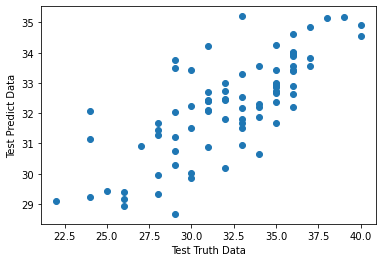

In [164]:
# relation between real and pred data 
plt.scatter(y_test,el_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [165]:
## calculate residual
residual = y_test-el_prd
residual

162    2.137264
60     2.023368
61     3.374946
63     3.307787
69     2.013482
         ...   
169    0.476776
232   -4.744907
144    1.321063
208   -2.204433
105   -7.104732
Name: Temperature, Length: 81, dtype: float64

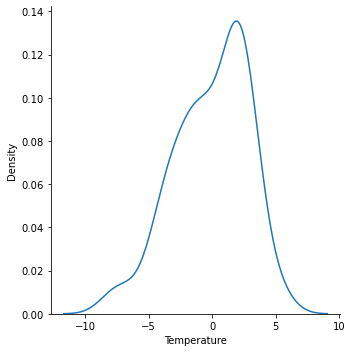

In [166]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')

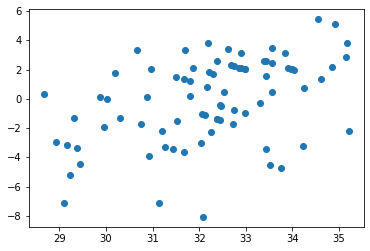

In [167]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(el_prd,residual)

#### performance Metrics

In [168]:
print(mean_squared_error(y_test,el_prd))
print(mean_absolute_error(y_test,el_prd))
print(np.sqrt(mean_squared_error(y_test,el_prd)))

8.303580833287832
2.396684695657916
2.881593453852891


In [169]:
score = r2_score(y_test,el_prd)
print(score)

0.45090816336550354


In [170]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.4248736366285232


## Thank you 